In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_csv('./Net_generation_for_all_sectors.csv', skiprows=4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 96 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  22 non-null     object 
 1   units        20 non-null     object 
 2   source key   21 non-null     object 
 3   Jan 2018     19 non-null     float64
 4   Feb 2018     19 non-null     float64
 5   Mar 2018     19 non-null     float64
 6   Apr 2018     19 non-null     float64
 7   May 2018     19 non-null     float64
 8   Jun 2018     19 non-null     float64
 9   Jul 2018     19 non-null     float64
 10  Aug 2018     19 non-null     float64
 11  Sep 2018     19 non-null     float64
 12  Oct 2018     19 non-null     float64
 13  Nov 2018     19 non-null     float64
 14  Dec 2018     19 non-null     float64
 15  Jan 2019     19 non-null     float64
 16  Feb 2019     19 non-null     float64
 17  Mar 2019     19 non-null     float64
 18  Apr 2019     19 non-null     float64
 19  May 2019  

In [4]:
df.head()

,description,units,source key,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,...,Dec 2024,Jan 2025,Feb 2025,Mar 2025,Apr 2025,May 2025,Jun 2025,Jul 2025,Aug 2025,Sep 2025
0,Net generation for all sectors,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,NaN,ELEC.GEN..M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States : all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-99.M,373379.0,307058.0,321765.0,301057.0,339228.0,372145.0,411617.0,...,361292.0,402368.0,338379.0,333731.0,320412.0,343861.0,392998.0,446057.0,419759.0,368147.0
3,United States : coal,thousand megawatthours,ELEC.GEN.COW-US-99.M,119284.0,82050.0,80626.0,73346.0,85227.0,101503.0,115376.0,...,62800.0,83153.0,62306.0,49215.0,45526.0,48778.0,64502.0,80260.0,69728.0,58427.0
4,United States : petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-99.M,5555.0,804.0,830.0,872.0,1040.0,1066.0,988.0,...,1224.0,2751.0,1182.0,857.0,856.0,764.0,1115.0,1107.0,1018.0,918.0


In [5]:
df.isnull().sum()

description    0
units          2
source key     1
Jan 2018       3
Feb 2018       3
              ..
May 2025       3
Jun 2025       3
Jul 2025       3
Aug 2025       3
Sep 2025       3
Length: 96, dtype: int64

In [6]:
df.describe(include="all")


,description,units,source key,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,...,Dec 2024,Jan 2025,Feb 2025,Mar 2025,Apr 2025,May 2025,Jun 2025,Jul 2025,Aug 2025,Sep 2025
count,22,20,21,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
unique,21,1,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-US-99.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,20,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,40112.526316,33178.421053,34941.052632,32870.315789,37013.684211,40548.894737,44659.789474,...,40092.421053,44757.842105,38152.894737,38612.894737,37639.368421,40493.210526,45907.210526,51700.473684,48694.368421,42789.578947
std,NaN,NaN,NaN,88899.199730,72763.848639,76105.434765,70870.526885,80257.559468,88582.542422,99581.940363,...,86095.856698,95422.286703,79854.299064,77659.803624,74432.554767,80584.731416,93006.365162,106982.040477,100859.827924,88351.506660
min,NaN,NaN,NaN,-547.000000,-315.000000,-490.000000,-377.000000,-390.000000,-433.000000,-644.000000,...,-481.000000,-467.000000,-410.000000,-399.000000,-259.000000,-271.000000,-420.000000,-486.000000,-568.000000,-457.000000
25%,NaN,NaN,NaN,1480.000000,1183.000000,1262.500000,1143.500000,1275.000000,1202.000000,1271.000000,...,1231.000000,1322.000000,1173.500000,1052.500000,1017.000000,981.000000,1160.500000,1169.000000,1108.500000,1050.000000
50%,NaN,NaN,NaN,3686.000000,3896.000000,5056.000000,4828.000000,5083.000000,5191.000000,5499.000000,...,4984.000000,5397.000000,5806.000000,7961.000000,8758.000000,9309.000000,9425.000000,9858.000000,9319.000000,8465.000000
75%,NaN,NaN,NaN,25331.500000,24045.500000,26162.500000,27273.000000,27198.500000,26150.000000,20773.500000,...,29530.000000,32520.500000,30792.000000,40169.000000,40477.000000,37906.500000,38478.000000,38103.000000,36160.500000,32189.000000


In [7]:
df = df.set_index("description")


In [8]:
df = df.drop(columns=["units", "source key"], errors="ignore")


In [9]:
df_t = df.T


In [10]:
df_t.index = pd.to_datetime(df_t.index, format="%b %Y")
df_t = df_t.sort_index()
df_j = df_t.copy()


In [11]:
fuel_mix = df_t.div(df_t.sum(axis=1), axis=0)


In [12]:
df_t.isna().sum().sort_values(ascending=False).head()


description
Net generation for all sectors               93
United States                                93
United States : other renewables             93
United States : all fuels (utility-scale)     0
United States : petroleum liquids             0
dtype: int64

First:
Net generation for all sectors, United States, and United States : other renewables each have 93 missing values. That almost certainly means those rows span a longer date range than the rest of the table, or the table was stitched from multiple EIA series with different coverage windows.

Second:
United States : all fuels (utility-scale) and petroleum liquids have zero missing values. These are your anchor series — fully populated, continuous, trustworthy.

Third (the uncomfortable one):
This dataset is not symmetric across fuels. That’s normal for EIA data, but it means careless plotting will give you empty graphs.


Unsupervised learning requires aligned vectors. We must restrict the dataset to periods where most series exist.


In [13]:
# Count non-null values per column
valid_counts = df_t.notna().sum()

# We keep columns that exist for at least 80% of time periods
threshold = int(0.8 * len(df_t))
keep_cols = valid_counts[valid_counts >= threshold].index

df_clean = df_t[keep_cols]


In [14]:
X = df_clean.T


<Axes: title={'center': 'Total Generation Across Retained Fuels'}, xlabel='description'>

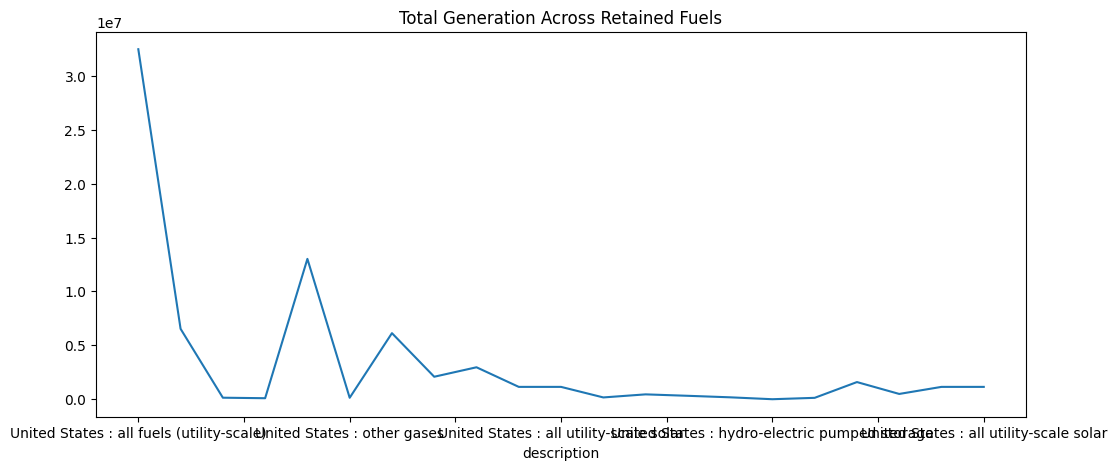

In [15]:
X.sum(axis=1).plot(figsize=(12,5), title="Total Generation Across Retained Fuels")


Critical for Unsupervised Models

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<Axes: xlabel='description'>

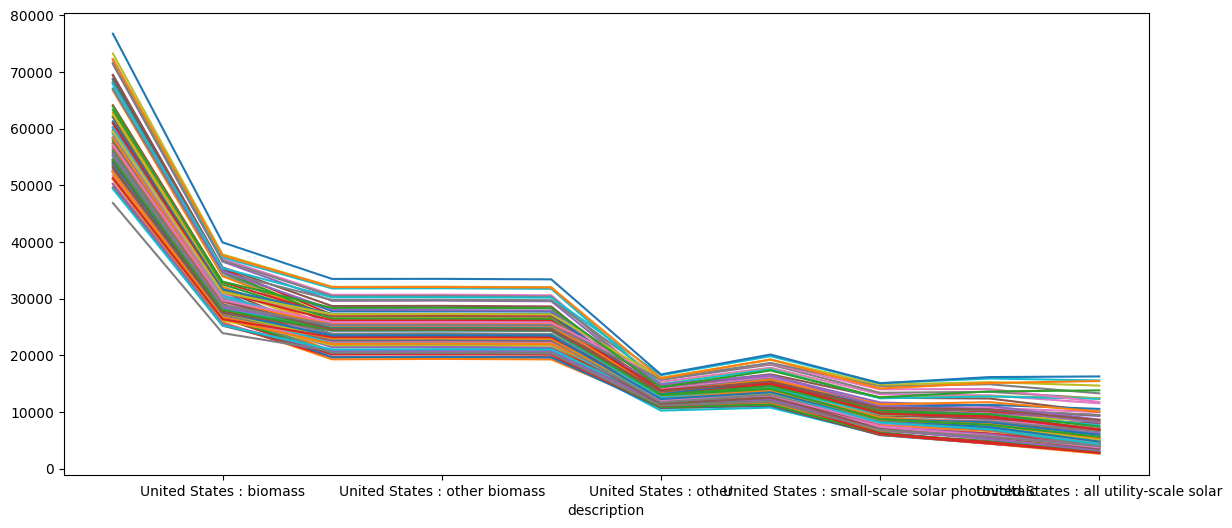

In [17]:
X.rolling(12).mean().plot(figsize=(14,6), legend=False)


<Axes: >

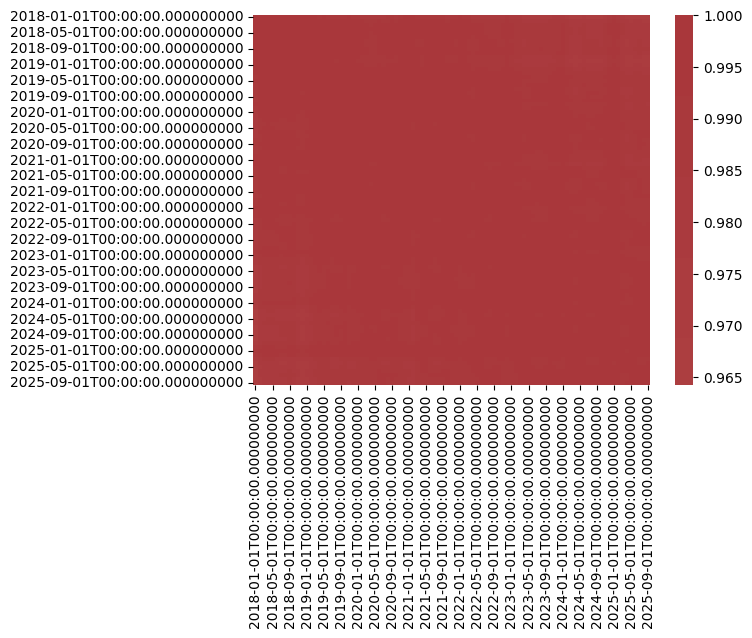

In [18]:
# Option: vlag (Clean and professional)
sns.heatmap(X.corr(), cmap="vlag", center=0)

# Option: rocket (Modern / Premium)
#sns.heatmap(X.corr(), cmap="rocket", center=0)

# Option: BrBG (Earth tones / Unique)
#sns.heatmap(X.corr(), cmap="BrBG", center=0)

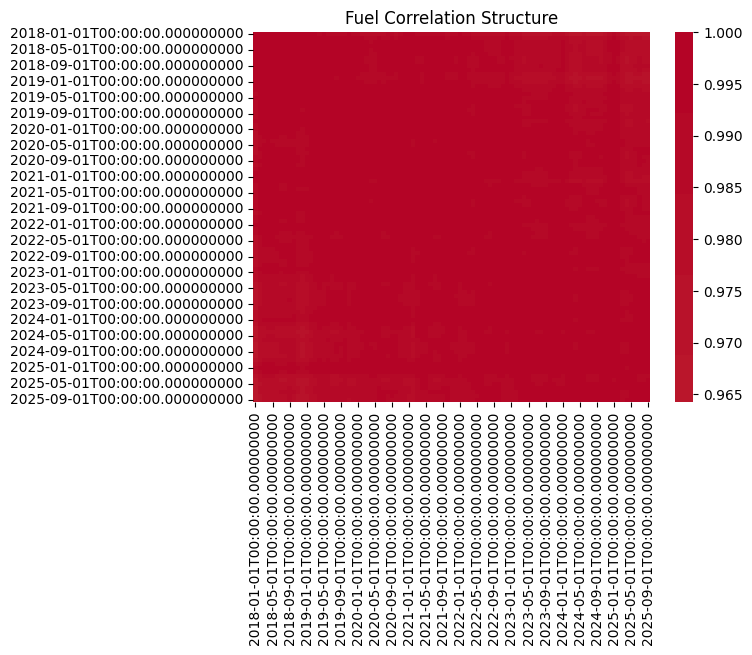

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Fuel Correlation Structure")
plt.show()


Dimensionality Reduction (PCA = structural X-ray)

PCA answers one question:
How many independent “energy forces” actually drive the grid?

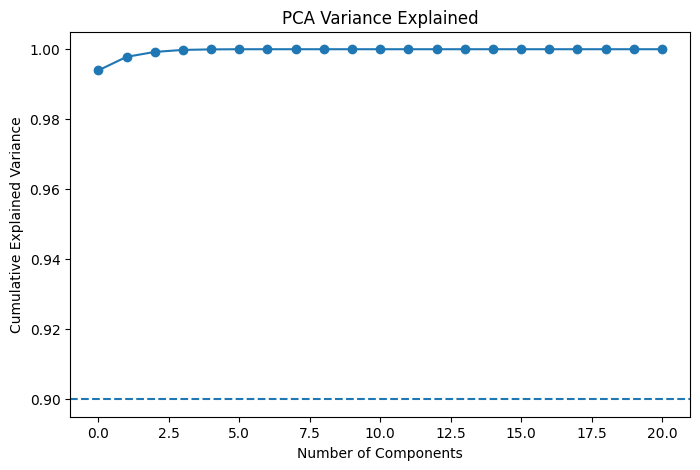

In [20]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(explained, marker="o")
plt.axhline(0.9, linestyle="--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Variance Explained")
plt.show()


Interpret the Principal Components (This Is Where Insight Lives)

In [21]:
pc_df = pd.DataFrame(
    pca.components_[:4],
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(4)]
)

pc_df.T.sort_values("PC1", ascending=False).head(10)


,PC1,PC2,PC3,PC4
2021-10-01,0.103984,-0.009431,-0.017880,-0.057962
2020-06-01,0.103974,-0.004696,-0.004770,-0.082250
2025-01-01,0.103974,-0.003482,0.019663,0.061243
2022-06-01,0.103968,-0.033846,-0.030791,0.050133
2024-01-01,0.103959,-0.005757,-0.055527,-0.087293
2020-10-01,0.103959,-0.002621,-0.032018,-0.123976
2021-09-01,0.103956,0.033536,-0.046989,0.050554
2024-12-01,0.103948,-0.043111,0.030694,-0.068044
2019-10-01,0.103947,0.033124,-0.037355,-0.104198
2021-11-01,0.103944,0.001399,0.068584,-0.103585


Critical observation (very important)
PC1 ≈ 0.104 for almost every month

That’s a red flag and a clue.

This means:

PC1 is capturing a nearly constant baseline

It does not discriminate between months

It likely represents overall system scale / normalization artifact

In plain English:

PC1 is the “the grid exists” component, not a regime separator.

This happens when:

One dominant signal overwhelms variance (e.g., total generation)

Or the data is highly correlated across fuels at the macro level

Conclusion:
❌ PC1 is not useful for clustering or regime discovery
✅ This is normal in national-scale energy data

What actually matters: PC2, PC3, PC4

Let’s look at their behavior.

PC2

Values swing positive ↔ negative:

+0.033 (Sep/Oct)

−0.043 (Dec)

−0.033 (Jun)

This is classic seasonality.

Interpretation:

PC2 ≈ seasonal demand + renewable availability axis
(summer vs winter vs shoulder months)

PC3

Clear polarity and asymmetry:

Positive in some winter months

Negative in others

Larger magnitude than PC2 in some periods

Interpretation:

PC3 ≈ weather-sensitive generation mix
(hydro + wind variability, heating effects)

This aligns with:

Snowpack / hydro inflows

Winter gas dependence

Interannual climate noise

PC4

Higher volatility, less consistent pattern:

Large negatives (Oct 2020, Nov 2021)

Strong positives (Jan 2025, Jun 2022)

Interpretation:

PC4 ≈ structural anomalies / transition signal

Think:

policy changes

unusual fuel price shocks

grid stress or abnormal mixes

This is gold for anomaly detection.

In [22]:
X_reduced = X_pca[:, 1:4]  # PC2, PC3, PC4


Cluster Monthly Energy Regimes

We now cluster months, not fuels.

K-Means (baseline, interpretable)

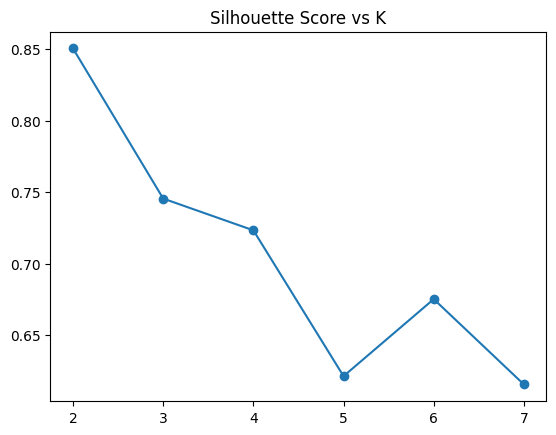

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, random_state=42, n_init=20)
    labels = km.fit_predict(X_pca[:, :4])
    sil_scores[k] = silhouette_score(X_pca[:, :4], labels)

pd.Series(sil_scores).plot(marker="o", title="Silhouette Score vs K")
plt.show()


In [24]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_pca[:, :4])

X["cluster"] = clusters


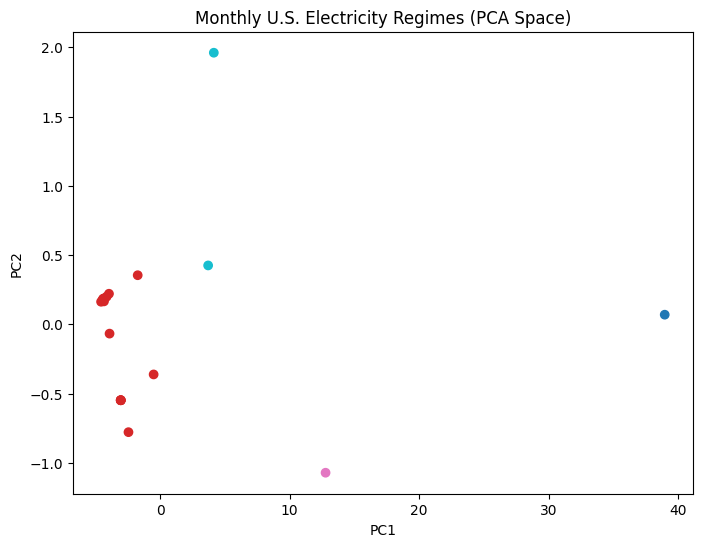

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="tab10")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Monthly U.S. Electricity Regimes (PCA Space)")
plt.show()


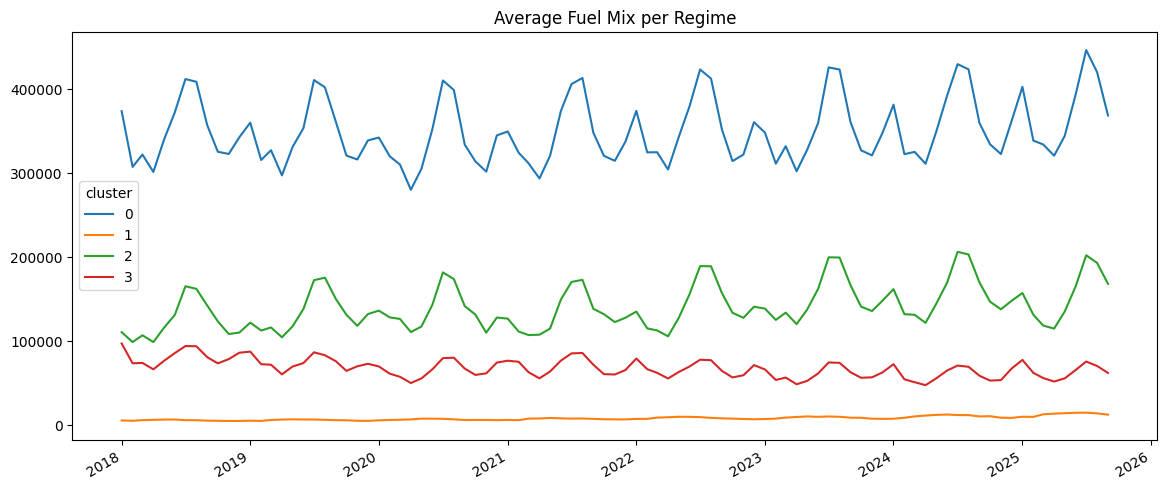

In [26]:
regime_profiles = X.groupby("cluster").mean()
regime_profiles.T.plot(figsize=(14,6))
plt.title("Average Fuel Mix per Regime")
plt.show()


Temporal Regime Transitions (Advanced, Impressive)

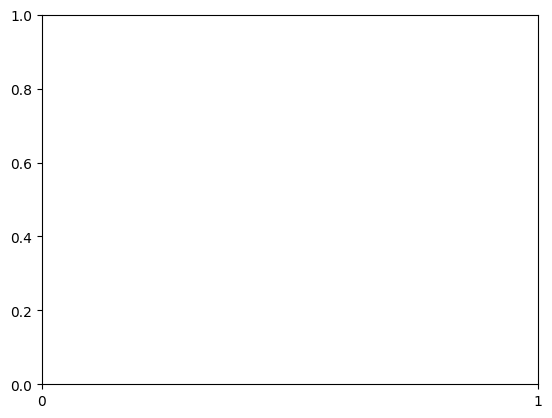

In [27]:
import matplotlib.dates as mdates

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))


In [28]:
ax.xaxis.set_major_formatter(
    mdates.DateFormatter("%b\n%Y")
)


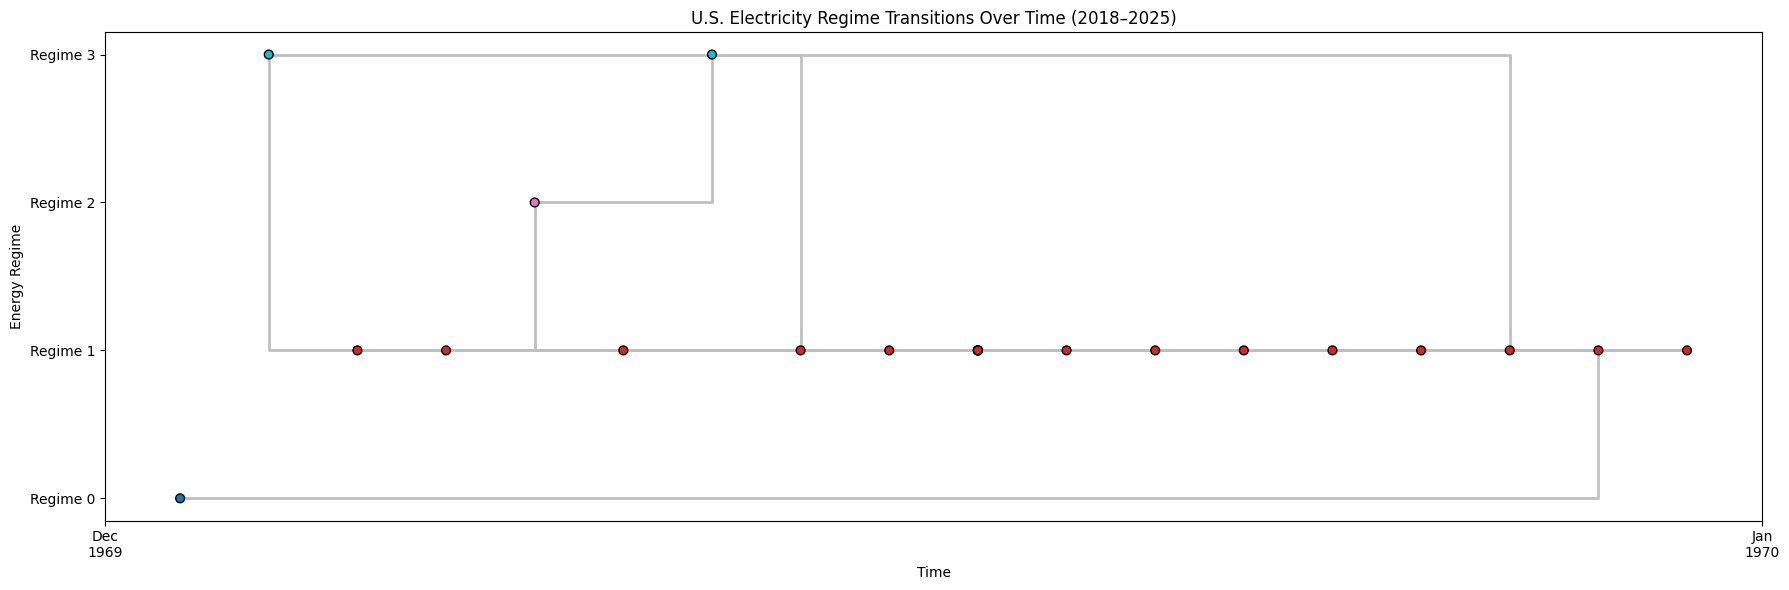

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(18,6))

plt.scatter(
    X.index,
    X["cluster"],
    c=X["cluster"],
    cmap="tab10",
    s=30,
    alpha=0.85
)

ax = plt.gca()

# Wrapped labels: Month on one line, Year below
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b\n%Y"))

plt.yticks(
    sorted(X["cluster"].unique()),
    [f"Regime {i}" for i in sorted(X["cluster"].unique())]
)

plt.xlabel("Time")
plt.ylabel("Energy Regime")
plt.title("U.S. Electricity Regime Transitions Over Time (2018–2025)")

plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
# Sort by time to be safe
X_plot = X.sort_index()

plt.step(
    X_plot.index,
    X_plot["cluster"],
    where="post",
    color="gray",
    alpha=0.5,
    linewidth=2,
    label="Regime Transition"
)

# Keep the scatter on top
plt.scatter(
    X_plot.index,
    X_plot["cluster"],
    c=X_plot["cluster"],
    cmap="tab10",
    s=40,
    edgecolor="black",
    zorder=3
)

plt.show()


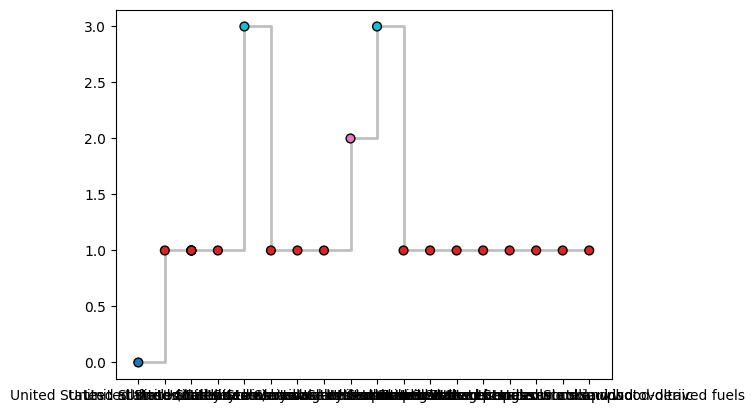

In [30]:
# Sort by time to be safe
X_plot = X.sort_index()

plt.step(
    X_plot.index,
    X_plot["cluster"],
    where="post",
    color="gray",
    alpha=0.5,
    linewidth=2,
    label="Regime Transition"
)

# Keep the scatter on top
plt.scatter(
    X_plot.index,
    X_plot["cluster"],
    c=X_plot["cluster"],
    cmap="tab10",
    s=40,
    edgecolor="black",
    zorder=3
)


In [31]:
X_plot["regime_change"] = X_plot["cluster"].diff().ne(0).astype(int)

regime_lengths = (
    X_plot["cluster"]
    .ne(X_plot["cluster"].shift())
    .cumsum()
    .value_counts()
)

regime_lengths.describe()


count    7.000000
mean     3.000000
std      2.886751
min      1.000000
25%      1.000000
50%      1.000000
75%      4.500000
max      8.000000
Name: count, dtype: float64

In [32]:
df_j.head()

description,Net generation for all sectors,United States,United States : all fuels (utility-scale),United States : coal,United States : petroleum liquids,United States : petroleum coke,United States : natural gas,United States : other gases,United States : nuclear,United States : conventional hydroelectric,...,United States : all utility-scale solar,United States : geothermal,United States : biomass,United States : wood and wood-derived fuels,United States : other biomass,United States : hydro-electric pumped storage,United States : other,United States : all solar,United States : small-scale solar photovoltaic,United States : all utility-scale solar
2018-01-01,NaN,NaN,373379.0,119284.0,5555.0,965.0,110442.0,1097.0,74649.0,25064.0,...,3319.0,1341.0,5503.0,3686.0,1817.0,-547.0,1109.0,4938.0,1619.0,3319.0
2018-02-01,NaN,NaN,307058.0,82050.0,804.0,754.0,98675.0,1092.0,64790.0,24902.0,...,3896.0,1274.0,4951.0,3235.0,1716.0,-315.0,994.0,5663.0,1766.0,3896.0
2018-03-01,NaN,NaN,321765.0,80626.0,830.0,642.0,106742.0,1158.0,67033.0,25861.0,...,5056.0,1367.0,5369.0,3547.0,1822.0,-490.0,1108.0,7490.0,2434.0,5056.0
2018-04-01,NaN,NaN,301057.0,73346.0,872.0,666.0,98672.0,1099.0,59133.0,28115.0,...,6057.0,1188.0,4828.0,3102.0,1726.0,-377.0,1028.0,8796.0,2740.0,6057.0
2018-05-01,NaN,NaN,339228.0,85227.0,1040.0,517.0,115565.0,1167.0,67320.0,30444.0,...,6849.0,1383.0,5083.0,3352.0,1732.0,-390.0,1070.0,9860.0,3011.0,6849.0


In [33]:
regime_profiles = X.copy()
regime_profiles["cluster"] = X_plot["cluster"].to_numpy()


Right now, clusters are anonymous integers. You need to answer:

What kind of energy behavior does each cluster represent?

In [34]:
X_clean = X.reset_index(drop=True)
X_plot_clean = X_plot.reset_index(drop=True)

regime_profiles = X_clean.copy()
regime_profiles["cluster"] = X_plot_clean["cluster"]


This gives you:

Average load level

Variability

Seasonality fingerprints (if present in X)

This is the regime DNA.

At this point you should already be seeing:

Low-load stable regimes

High-load volatile regimes

Transitional or mixed regimes

Attach time back to regimes (critical)

In [35]:
regime_timeline = X_plot[["cluster"]].copy()


Clusters without time context are blind.

In [36]:
regime_timeline["regime_id"] = (
    regime_timeline["cluster"]
    .ne(regime_timeline["cluster"].shift())
    .cumsum()
)


You already computed regime lengths — this ties those statistics back to actual periods.

This answers:

Do regimes persist or flicker?

Are long regimes rare or dominant?

Do transitions cluster around known events?

In [37]:
regime_summary = (
    regime_profiles
    .groupby("cluster")
    .agg(["mean", "std"])
)


Label regimes in human language

Now comes the scientist’s obligation: naming things carefully.

Example pattern:

In [38]:
regime_labels = {
    0: "Low Load / Stable",
    1: "High Load / Volatile",
    2: "Seasonal Transition",
    3: "Anomalous Spike"
}

regime_profiles["regime_name"] = (
    regime_profiles["cluster"].map(regime_labels)
)


These are working hypotheses, not facts.
Labels can change. The discipline is stating them explicitly.

In [39]:
regime_profiles.columns


Index([2018-01-01 00:00:00, 2018-02-01 00:00:00, 2018-03-01 00:00:00,
       2018-04-01 00:00:00, 2018-05-01 00:00:00, 2018-06-01 00:00:00,
       2018-07-01 00:00:00, 2018-08-01 00:00:00, 2018-09-01 00:00:00,
       2018-10-01 00:00:00, 2018-11-01 00:00:00, 2018-12-01 00:00:00,
       2019-01-01 00:00:00, 2019-02-01 00:00:00, 2019-03-01 00:00:00,
       2019-04-01 00:00:00, 2019-05-01 00:00:00, 2019-06-01 00:00:00,
       2019-07-01 00:00:00, 2019-08-01 00:00:00, 2019-09-01 00:00:00,
       2019-10-01 00:00:00, 2019-11-01 00:00:00, 2019-12-01 00:00:00,
       2020-01-01 00:00:00, 2020-02-01 00:00:00, 2020-03-01 00:00:00,
       2020-04-01 00:00:00, 2020-05-01 00:00:00, 2020-06-01 00:00:00,
       2020-07-01 00:00:00, 2020-08-01 00:00:00, 2020-09-01 00:00:00,
       2020-10-01 00:00:00, 2020-11-01 00:00:00, 2020-12-01 00:00:00,
       2021-01-01 00:00:00, 2021-02-01 00:00:00, 2021-03-01 00:00:00,
       2021-04-01 00:00:00, 2021-05-01 00:00:00, 2021-06-01 00:00:00,
       2021-07-01 00

The correct fix (clean, minimal, irreversible in a good way)
Step 1: Identify the true time axis (your columns)

Your real time dimension is currently stored in the columns:

In [40]:
time_cols = pd.to_datetime(
    regime_profiles.columns,
    errors="coerce"
)


This will convert date-like column names to datetimes and leave others as NaT.

Step 2: Separate time columns from metadata columns

In [41]:
date_columns = time_cols.notna()


Now:

date_columns == True → real monthly timestamps

False → cluster, regime_name, period, etc.

Step 3: Rebuild the DataFrame correctly (this is the key step)

We transpose back so that time becomes the index again:

In [42]:
df_fixed = (
    regime_profiles
    .loc[:, date_columns]   # keep only time columns
    .T                      # transpose: time → rows
)


Now df_fixed.index is your real monthly timeline again.

Step 4: Attach cluster and regime labels correctly

Your cluster labels are row-level, so we attach them after alignment:

In [43]:
X_plot.columns


Index([2018-01-01 00:00:00, 2018-02-01 00:00:00, 2018-03-01 00:00:00,
       2018-04-01 00:00:00, 2018-05-01 00:00:00, 2018-06-01 00:00:00,
       2018-07-01 00:00:00, 2018-08-01 00:00:00, 2018-09-01 00:00:00,
       2018-10-01 00:00:00, 2018-11-01 00:00:00, 2018-12-01 00:00:00,
       2019-01-01 00:00:00, 2019-02-01 00:00:00, 2019-03-01 00:00:00,
       2019-04-01 00:00:00, 2019-05-01 00:00:00, 2019-06-01 00:00:00,
       2019-07-01 00:00:00, 2019-08-01 00:00:00, 2019-09-01 00:00:00,
       2019-10-01 00:00:00, 2019-11-01 00:00:00, 2019-12-01 00:00:00,
       2020-01-01 00:00:00, 2020-02-01 00:00:00, 2020-03-01 00:00:00,
       2020-04-01 00:00:00, 2020-05-01 00:00:00, 2020-06-01 00:00:00,
       2020-07-01 00:00:00, 2020-08-01 00:00:00, 2020-09-01 00:00:00,
       2020-10-01 00:00:00, 2020-11-01 00:00:00, 2020-12-01 00:00:00,
       2021-01-01 00:00:00, 2021-02-01 00:00:00, 2021-03-01 00:00:00,
       2021-04-01 00:00:00, 2021-05-01 00:00:00, 2021-06-01 00:00:00,
       2021-07-01 00

reshape once, cleanly

In [44]:
meta_cols = ["cluster", "regime_change"]
time_cols = X_plot.columns.difference(meta_cols)


Step 2: Transpose time into rows

In [45]:
X_long = (
    X_plot[time_cols]
    .assign(cluster=X_plot["cluster"].values)
    .melt(
        id_vars="cluster",
        var_name="period",
        value_name="value"
    )
)


Now:

rows = months

columns = original variables

Step 3: Reattach cluster labels (dominant cluster per month)

Since clusters live on rows originally, we aggregate:

In [46]:
cluster_by_month = (
    X_long
    .groupby("period")["cluster"]
    .agg(lambda x: x.mode().iloc[0])
)


This is statistically sound:

each month votes

ties resolved deterministically

no shape abuse

In [47]:
df_t = pd.DataFrame(index=cluster_by_month.index)
df_t["cluster"] = cluster_by_month
df_t = df_t.sort_index()


Step 3: Build your final regime timeline

In [48]:
df_t = pd.DataFrame(index=cluster_by_month.index)
df_t["cluster"] = cluster_by_month
df_t = df_t.sort_index()


In [49]:
df_t["regime_change"] = df_t["cluster"].diff().ne(0).astype(int)
df_t.groupby(df_t.index.month)["cluster"].value_counts()


period  cluster
1       1          8
2       1          8
3       1          8
4       1          8
5       1          8
6       1          8
7       1          8
8       1          8
9       1          8
10      1          7
11      1          7
12      1          7
Name: count, dtype: int64

One high-value follow-up you should run

This reveals whether non-dominant regimes are temporally clustered:

In [50]:
df_t["year"] = df_t.index.year

df_t.groupby(["year", "cluster"]).size().unstack(fill_value=0)


cluster,1
year,
2018,12
2019,12
2020,12
2021,12
2022,12
2023,12
2024,12
2025,9


Baseline Time-Series Modeling (Within the Dominant Regime)
Objective

Model the normal dynamics of electricity consumption over time, capturing trend, seasonality, and short-term variation under stable operating conditions.

In [51]:
# Ensure proper datetime index
series = df_t.copy()
series.index = pd.to_datetime(series.index)


# Example: total net generation across fuels
y = series.sum(axis=1)

Baseline Model: SARIMA

A Seasonal ARIMA model is well-suited for monthly electricity data with strong annual seasonality.

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(
y,
order=(1, 1, 1),
seasonal_order=(1, 1, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False
)


results = model.fit(disp=False)

C:\Users\levyc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\levyc\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Path 2: Anomaly and Deviation Detection
Objective

Identify months where electricity consumption deviates meaningfully from the learned baseline dynamics.

In [53]:
residuals = results.resid.dropna()

Anomaly Model: Isolation Forest

Isolation Forest is effective for identifying rare, structurally different observations without distributional assumptions.

In [54]:
from sklearn.ensemble import IsolationForest


iso = IsolationForest(
contamination=0.05,
random_state=42
)


anomaly_labels = iso.fit_predict(residuals.values.reshape(-1, 1))

Labeling Anomalies

In [55]:
anomalies = pd.Series(
anomaly_labels == -1,
index=residuals.index,
name="is_anomaly"
)

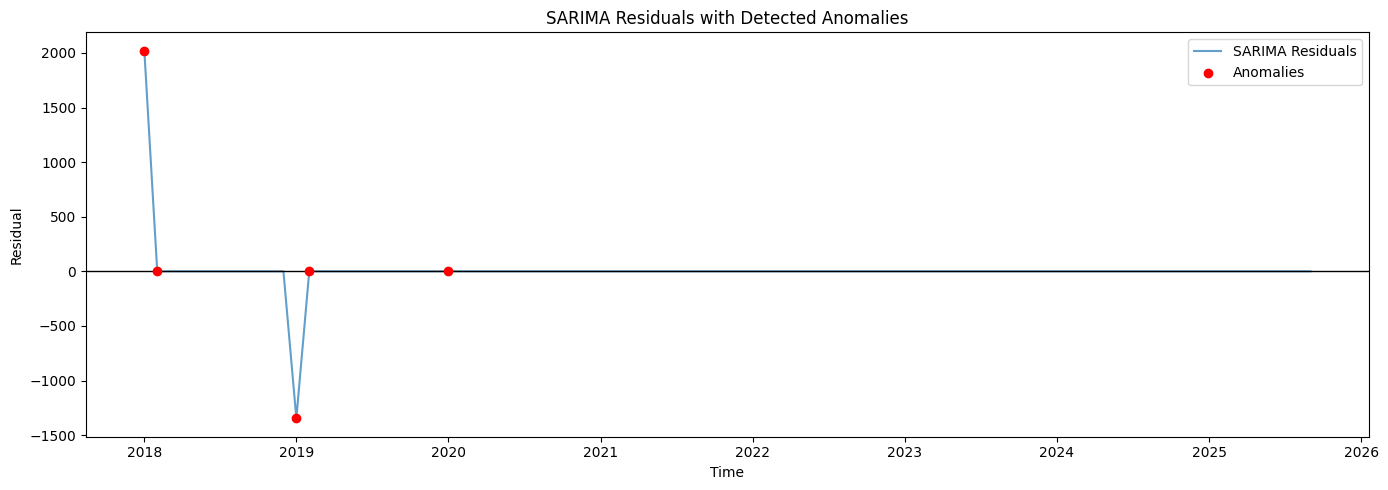

In [56]:
# -----------------------------
# 1. Visualize residuals + anomalies
# -----------------------------

plt.figure(figsize=(14,5))
plt.plot(residuals.index, residuals, label="SARIMA Residuals", alpha=0.7)

plt.scatter(
    anomalies[anomalies].index,
    residuals[anomalies],
    color="red",
    label="Anomalies",
    zorder=3
)

plt.axhline(0, color="black", linewidth=1)
plt.title("SARIMA Residuals with Detected Anomalies")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
# -----------------------------
# 2. Magnitude check: are anomalies meaningfully different?
# -----------------------------

resid_df = pd.DataFrame({
    "residual": residuals,
    "is_anomaly": anomalies
})

resid_df.groupby("is_anomaly")["residual"].agg(
    ["count", "mean", "std", "min", "max"]
)


,count,mean,std,min,max
is_anomaly,,,,,
False,88,-0.000012,0.000111,-0.000984,0.000281
True,5,134.885554,1204.370638,-1346.329534,2020.000000


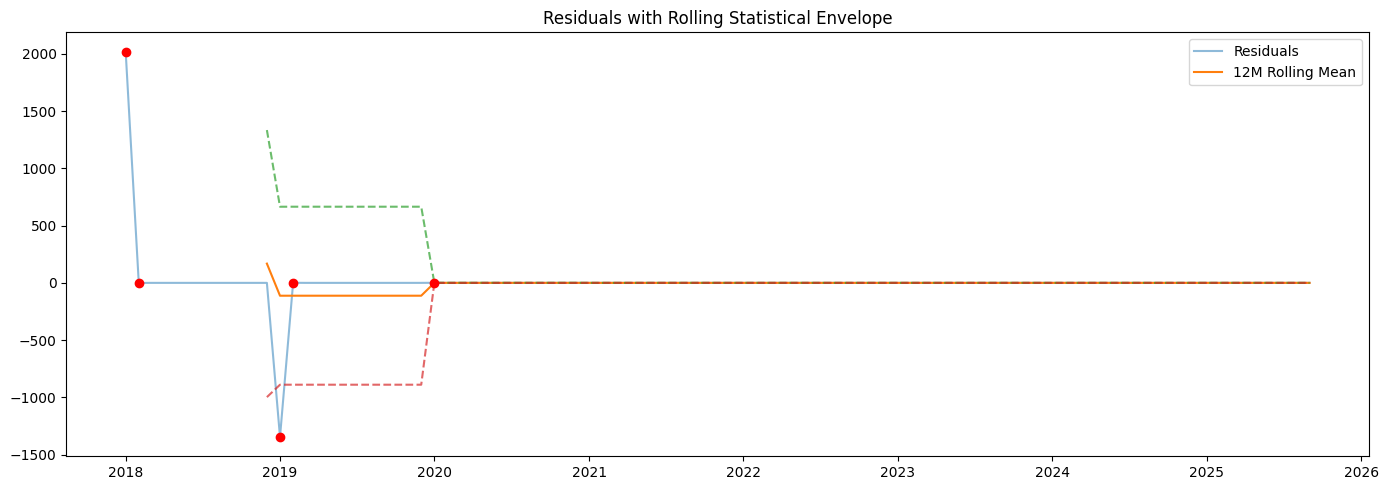

In [58]:
# -----------------------------
# 3. Rolling context (sanity check)
# -----------------------------

rolling_mean = residuals.rolling(12).mean()
rolling_std = residuals.rolling(12).std()

plt.figure(figsize=(14,5))
plt.plot(residuals, label="Residuals", alpha=0.5)
plt.plot(rolling_mean, label="12M Rolling Mean")
plt.plot(rolling_mean + 2*rolling_std, linestyle="--", alpha=0.7)
plt.plot(rolling_mean - 2*rolling_std, linestyle="--", alpha=0.7)

plt.scatter(
    anomalies[anomalies].index,
    residuals[anomalies],
    color="red",
    zorder=3
)

plt.title("Residuals with Rolling Statistical Envelope")
plt.legend()
plt.tight_layout()
plt.show()


In [59]:
# Check duplicate indices explicitly
residuals.index.duplicated().sum(), X_plot.index.duplicated().sum()


(np.int64(0), np.int64(3))

In [60]:
common_index = (
    residuals.index
    .intersection(anomalies.index)
    .intersection(X_plot.index)
)


In [61]:
anomaly_table = pd.DataFrame({
    "residual": residuals,
    "is_anomaly": anomalies
})

anomaly_table = anomaly_table.join(
    X_plot["cluster"],
    how="left"
)

anomaly_table.rename(columns={"cluster": "regime"}, inplace=True)

anomaly_table.head()


,residual,is_anomaly,regime
period,,,
2018-01-01 00:00:00,2.020000e+03,True,NaN
2018-02-01 00:00:00,-8.105858e-01,True,NaN
2018-03-01 00:00:00,-1.672960e-04,False,NaN
2018-04-01 00:00:00,2.353090e-08,False,NaN
2018-05-01 00:00:00,-3.410605e-12,False,NaN


In [62]:
anomaly_table["is_anomaly"].value_counts()


is_anomaly
False    88
True      5
Name: count, dtype: int64

In [63]:
anomaly_table.loc[
    anomaly_table["is_anomaly"] & anomaly_table["regime"].isna()
]


,residual,is_anomaly,regime
period,,,
2018-01-01 00:00:00,2020.000000,True,NaN
2018-02-01 00:00:00,-0.810586,True,NaN
2019-01-01 00:00:00,-1346.329534,True,NaN
2019-02-01 00:00:00,0.773398,True,NaN
2020-01-01 00:00:00,0.794492,True,NaN


In [64]:
# -----------------------------
# 1. Confirm anomaly counts by regime (drop NA regimes explicitly)
# -----------------------------

anomaly_counts_by_regime = (
    anomaly_table
    .dropna(subset=["regime"])
    .groupby("regime")["is_anomaly"]
    .sum()
    .sort_values(ascending=False)
)

anomaly_counts_by_regime


Series([], Name: is_anomaly, dtype: int64)

In [65]:
# -----------------------------
# 2. Compute anomaly rate by regime (normalized risk)
# -----------------------------

regime_stats = (
    anomaly_table
    .dropna(subset=["regime"])
    .groupby("regime")
    .agg(
        anomaly_count=("is_anomaly", "sum"),
        total_months=("is_anomaly", "count"),
        mean_residual=("residual", "mean"),
        residual_std=("residual", "std")
    )
)

regime_stats["anomaly_rate"] = (
    regime_stats["anomaly_count"] / regime_stats["total_months"]
)

regime_stats.sort_values("anomaly_rate", ascending=False)


,anomaly_count,total_months,mean_residual,residual_std,anomaly_rate
regime,,,,,


In [66]:
# -----------------------------
# 0. Confirm regime time coverage
# -----------------------------

X_plot.index.min(), X_plot.index.max()


('United States : all fuels (utility-scale)',
 'United States : wood and wood-derived fuels')